<a href="https://colab.research.google.com/github/rmarvel23/projects/blob/main/ProyectoPython.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#IMPORTANTE: BORRAR COLUMNAS DE NEUTRO O CONVERTIRLAS A OTRA COSA

In [61]:
#PROBAR ESTE CÓDIGO
import chardet
import pandas as pd

def detectar_encoding(archivo_csv):
    with open(archivo_csv, 'rb') as f:
        resultado = chardet.detect(f.read())
    return resultado['encoding']

archivo_csv = '/content/train.csv'
encoding = detectar_encoding(archivo_csv)
print(f"El encoding detectado es: {encoding}")

df = pd.read_csv(archivo_csv, encoding=encoding, on_bad_lines='skip')
print(len(df))

El encoding detectado es: Windows-1252
27437


Proyecto **Python**

Nos quedamos con el train de sentiment edad

In [38]:
import pandas as pd
dataset = pd.read_csv("/content/train.csv", encoding='unicode_escape', on_bad_lines='skip')

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27437 entries, 0 to 27436
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   textID                       27437 non-null  object 
 1   text                         20923 non-null  object 
 2   selected_text                20920 non-null  object 
 3   sentiment                    20925 non-null  object 
 4   Time of Tweet                20925 non-null  object 
 5   Age of User                  20925 non-null  object 
 6   Country                      20925 non-null  object 
 7   Population -2020             20925 non-null  float64
 8   Land Area (Km²)              20925 non-null  object 
 9   Density (P/Km²);;;;;;;;;;;;  20890 non-null  object 
dtypes: float64(1), object(9)
memory usage: 2.1+ MB


In [4]:
def detectar_encoding(archivo_csv):
    with open(archivo_csv, 'rb') as f:
        resultado = chardet.detect(f.read())
    return resultado['encoding']

archivo_csv = '/content/train.csv'
encoding = detectar_encoding(archivo_csv)
print(f"El encoding detectado es: {encoding}")

El encoding detectado es: Windows-1252


In [24]:
class DataError(Exception):
    pass

In [27]:
import pandas as pd

class DataLoader:
    def __init__(self,file_path, encoding):
      self.file_path = file_path
      self.encoding = encoding
      self.dataset = None

    def load_data(self):

      try:
        self.dataset = pd.read_csv(self.file_path, encoding=self.encoding,on_bad_lines='skip')
        print("Data successfully loaded.")
      except Exception as e:
            raise DataError(f"Error loading data: {e}")

    def show_sample(self, n=5):
      if self.dataset is not None:
            return self.dataset.sample(n)
      else:
            raise DataError("No data loaded. Please load data first.")

    def get_info(self):
        if self.dataset is not None:
            return self.dataset.info()
        else:
            raise DataError("No data loaded. Please load data first.")

    def describe(self):
        if self.dataset is not None:
            return self.dataset.describe()
        else:
            raise DataError("No data loaded. Please load data first.")

    def get_columns(self):
        if self.dataset is not None:
            return self.dataset.columns
        else:
            raise DataError("No data loaded. Please load data first.")

    def count_rows(self, column):
        if self.dataset is not None:
            if column in self.dataset.columns:
                return self.dataset[column].count()
            else:
                raise DataError(f"Column '{column}' not found in dataset.")
        else:
            raise DataError("No data loaded. Please load data first.")

In [28]:
dataframe1 = DataLoader("/content/train.csv", "Windows-1252")

In [29]:
dataframe1.load_data()

Data successfully loaded.


In [33]:
dataframe1.get_info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27437 entries, 0 to 27436
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   textID                       27437 non-null  object 
 1   text                         20923 non-null  object 
 2   selected_text                20920 non-null  object 
 3   sentiment                    20925 non-null  object 
 4   Time of Tweet                20925 non-null  object 
 5   Age of User                  20925 non-null  object 
 6   Country                      20925 non-null  object 
 7   Population -2020             20925 non-null  float64
 8   Land Area (Km²)              20925 non-null  object 
 9   Density (P/Km²);;;;;;;;;;;;  20890 non-null  object 
dtypes: float64(1), object(9)
memory usage: 2.1+ MB


In [15]:
dataframe1.show_sample(2)

,textID,text,selected_text,sentiment,Time of Tweet,Age of User,Country,Population -2020,Land Area (Km²),Density (P/Km²);;;;;;;;;;;;
9904,1fe10d2ca0,to the doctor anyone wanna do somethin after ...,o the doctor anyone wanna do somethin after f...,neutral,noon,60-70,Iceland,341243.0,100250,3;;;;;;;;;;;;
20262,a53c431647,I dont know I didnt even realize it was gone...,...dar,negative,noon,21-30,Iran,83992949.0,1.63E+06,52;;;;;;;;;;;;


In [ ]:
dataset.isnull().sum()

textID                            0
text                           6514
selected_text                  6517
sentiment                      6512
Time of Tweet                  6512
Age of User                    6512
Country                        6512
Population -2020               6512
Land Area (Km²)                6512
Density (P/Km²);;;;;;;;;;;;    6547
dtype: int64

In [ ]:
#LIMPIEZA
def clean_columns_nulls(dataframe):
    # Eliminar filas con valores nulos en las columnas especificadas
    dataframe.dropna(subset=["selected_text", "sentiment", "Time of Tweet", "Age of User", "Country"], inplace=True)
    # Eliminar columnas innecesarias
    dataframe.drop(['textID', 'selected_text', 'Population -2020', 'Land Area (Km²)', 'Density (P/Km²)'], axis=1, inplace=True, errors='ignore')
    # Devolver el conteo de valores nulos por columna
    return dataframe.isnull().sum()

In [ ]:
clean_columns_nulls(dataset)

KeyError: ['selected_text']

In [ ]:
proyecto1 = DataLoader("/content/train.csv")

In [ ]:
proyecto1.load_data()

Data successfully loaded.


In [ ]:
proyecto1.show_sample(10)

,textID,text,selected_text,sentiment,Time of Tweet,Age of User,Country,Population -2020,Land Area (Km²),Density (P/Km²);;;;;;;;;;;;
16587,87eed4dc97,its it done?,its it done?,neutral,noon,60-70,Kyrgyzstan,6524195.0,191800,34;;;;;;;;;;;;
17969,f00076628b,Your welcome hun! They are all amazing peo...,! They are all amazing peopl,positive,morning,46-60,Turkmenistan,6031200.0,469930,13;;;;;;;;;;;;
16948,bc5a131667,HAPPY JUDDDAY,HAPPY JUDDDAY,positive,night,70-100,Pakistan,220892340.0,770880,287;;;;;;;;;;;;
15698,"c3bb37493e,""http://twitpic.com/4jerc view of A...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14515,59cd3e2b14,just now i know how twitter exactly work,just now i know how twitter exactly work,neutral,noon,21-30,Lebanon,6825445.0,10230,667;;;;;;;;;;;;
5938,4fa4f2bde8,what dey do homie? I wish it would stop raini...,what dey do homie? I wish it would stop rainin...,neutral,morning,0-20,Trinidad and Tobago,1399488.0,5130,273;;;;;;;;;;;;
21317,40c16b0da7,cant wait for prom and after prom party on friday,cant wait,positive,noon,21-30,Chad,16425864.0,1259200,13;;;;;;;;;;;;
19560,714d7c7a34,On train with at least two gaggles of teenager...,On train with at least two gaggles of teenager...,neutral,morning,0-20,Singapore,5850342.0,700,8358;;;;;;;;;;;;
16676,"73bc6c101b,""It`s hot. I could turn on the A/C...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11888,63549ea2e4,Going with Chantal to her aunt.,Going with Chantal to her aunt.,neutral,noon,21-30,Fiji,896445.0,18270,49;;;;;;;;;;;;


In [ ]:
#class ColumnDeleter:
    #def __init__(self):
     # pass

    #def remove_columns(self, dataset):
       # columns_to_remove = ['textID', 'selected_text', 'Population -2020', 'Land Area (Km²)', 'Density (P/Km²)']
        #if not isinstance(dataset, pd.DataFrame):
         # raise TypeError("Your dataset must be a Pandas DataFrame")
        #dataset.drop(columns=columns_to_remove, inplace=True, errors='ignore')
        #return dataset.columns

In [ ]:
proyecto2 = ColumnDeleter()

In [ ]:
proyecto2.remove_columns(proyecto1.dataset)

Index(['text', 'sentiment', 'Time of Tweet', 'Age of User', 'Country'], dtype='object')

In [ ]:
import matplotlib.pyplot as plt

class Country:

    def __init__(self, filepath):
      try:
            self.dataframe = pd.read_csv(filepath, encoding='unicode_escape', on_bad_lines='skip')
        except Exception as e:
            print(f"Error reading the CSV file: {e}")

    def get_positive(self, country):
      try:
        return self.dataframe[(self.dataframe['Country'] == country) & (self.dataframe['sentiment'] == "positive")].shape[0]
      except Exception as e:
        print("Error", e)

    def get_tweets_countries(self, country):
      try:
        sentiment_counts = self.dataframe[self.dataframe['Country'] == country]['sentiment'].value_counts()
        sentiment_counts.plot(kind='bar', figsize=(10, 6))
        plt.title(f'Tweets in {country}')
        plt.xlabel('Sentiment')
        plt.ylabel('Number of Tweets')
        plt.show()
      except Exception as e:
            print("Error:", e)

    def get_negative(self, country):
        try:
            return self.dataframe[(self.dataframe['Country'] == country) & (self.dataframe['sentiment'] == "negative")].shape[0]
        except Exception as e:
            print("Error", e)

    def compare_sentiment_between_countries(self, countries):
    try:
        sentiment_counts = self.dataframe[self.dataframe['Country'].isin(countries)].groupby(['Country', 'sentiment']).size().unstack()
        sentiment_counts.plot(kind='bar', stacked=True, figsize=(10, 6))
        plt.title('Sentiment Comparison Between Countries')
        plt.xlabel('Country')
        plt.ylabel('Number of Tweets')
        plt.show()
    except Exception as e:
        print(f"Error comparing sentiment between countries: {e}")

class Hour:
    #PONER ESTO EN CLASES DIFERENTES O EN LA MISMA CLASE DE VISUALIZACIÓN?

    def __init__(self, filepath):
      try:
            self.dataframe = pd.read_csv(filepath, encoding='unicode_escape', on_bad_lines='skip')
        except Exception as e:
            print(f"Error reading the CSV file: {e}")

    def get_tweets_by_hour(self, country):
        try:
            hour_counts_ self.dataframe[self.dataframe['Country'] == country]['Time of Tweet'].value_counts().sort_index()
            hour_counts.plot(kind='bar', figsize=(10, 6))
            plt.title(f'Tweets by Hour of the Day in {country}')
            plt.xlabel('Hour of the Day')
            plt.ylabel('Number of Tweets')
            plt.show()
        except Exception as e:
            print(f"Error plotting tweets by hour for {country}: {e}")

    def get_sentiment_by_age_range(self, country):
        try:
            age_sentiment_counts = self.dataframe[self.dataframe['Country'] == country].groupby(['Age of User', 'sentiment']).size().unstack().fillna(0)?????
            age_sentiment_counts.plot(kind='bar', stacked=True, figsize=(10, 6))
            plt.title(f'Sentiment Distribution by Age Range in {country}')
            plt.xlabel('Age Range')
            plt.ylabel('Number of Tweets')
            plt.show()
        except Exception as e:
            print(f"Error plotting sentiment by age range for {country}: {e}")




Hacer funciones para: obtener tuits negativos y neutros por país
Obtener gráficas por países de tuis negativos, neutros y positivos
Limpiar de alguna forma la edad y hacer clase con gráficos para la edad por tipo de tuit.

In [ ]:
project23 = Country()

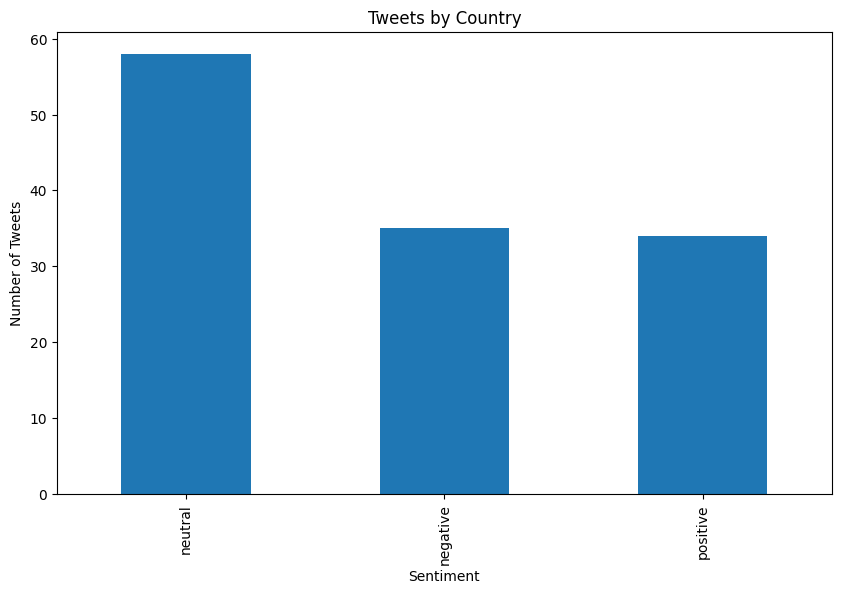

In [ ]:
project23.get_tweets_countries(proyecto1.dataset, "Switzerland")

In [ ]:
positivo = Country()

In [ ]:
positivo.get_positive(proyecto1.dataset, "Colombia")

48

In [74]:
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')
from collections import Counter
import re
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')

def tokenize_text(text):
    return word_tokenize(text)

def tokenize_text_negative(dataset):
     try:
        negative_tweets = dataset[dataset['sentiment'] == 'negative']
        negative_tweets['tokens'] = negative_tweets['text'].apply(tokenize_text)
        negative_words = [word for tokens in negative_tweets['tokens'] for word in tokens]
        bag_of_words = Counter(negative_words)
        return bag_of_words
     except Exception as e:
        print(f"Error creating bag of words: {e}")
def tokenize_text_positive(dataset):
     try:
        positive_tweets = dataset[dataset['sentiment'] == 'positive']
        positive_tweets['text'] = positive_tweets['text'].astype(str)
        positive_tweets['tokens'] = positive_tweets['text'].apply(tokenize_text)
        positive_words = [word for tokens in positive_tweets['tokens'] for word in tokens]
        bag_of_words = Counter(positive_words)
        return bag_of_words
     except Exception as e:
        print(f"Error creating bag of words: {e}")


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [75]:
bags_of_pwords = tokenize_text_positive(dataset)

<ipython-input-74-866fc221ef65>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  positive_tweets['text'] = positive_tweets['text'].astype(str)
<ipython-input-74-866fc221ef65>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  positive_tweets['tokens'] = positive_tweets['text'].apply(tokenize_text)


In [76]:
bags_of_pwords

Counter({'2am': 2,
         'feedings': 1,
         'for': 928,
         'the': 1935,
         'baby': 42,
         'are': 301,
         'fun': 230,
         'when': 119,
         'he': 104,
         'is': 777,
         'all': 413,
         'smiles': 3,
         'and': 1019,
         'coos': 1,
         'Journey': 1,
         '!': 5076,
         '?': 570,
         'Wow': 26,
         '...': 844,
         'u': 228,
         'just': 329,
         'became': 3,
         'cooler': 4,
         '.': 2981,
         'hehe': 21,
         '(': 166,
         'that': 540,
         'possible': 5,
         ')': 218,
         'I': 2107,
         'really': 195,
         'like': 275,
         'song': 61,
         'Love': 87,
         'Story': 4,
         'by': 94,
         'Taylor': 4,
         'Swift': 2,
         'Playing': 6,
         'Ghost': 2,
         'Online': 1,
         'interesting': 30,
         'The': 129,
         'new': 169,
         'updates': 6,
         'Kirin': 1,
         'pet': 5,
 

In [64]:
bags_of_words = tokenize_text_negative(dataset)

<ipython-input-63-725c73440e44>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  negative_tweets['tokens'] = negative_tweets['text'].apply(tokenize_text)


In [65]:
bags_of_words

Counter({'Sooo': 5,
         'SAD': 8,
         'I': 2718,
         'will': 145,
         'miss': 320,
         'you': 672,
         'here': 125,
         'in': 748,
         'San': 4,
         'Diego': 2,
         '!': 3181,
         'my': 1341,
         'boss': 5,
         'is': 938,
         'bullying': 1,
         'me': 729,
         '...': 1051,
         'what': 157,
         'interview': 3,
         'leave': 38,
         'alone': 24,
         'My': 175,
         'Sharpie': 1,
         'running': 17,
         'DANGERously': 1,
         'low': 10,
         'on': 564,
         'ink': 1,
         'i': 1387,
         'want': 177,
         'to': 2056,
         'go': 286,
         'music': 25,
         'tonight': 97,
         'but': 358,
         'lost': 73,
         'voice': 14,
         '.': 3156,
         'back': 140,
         'home': 139,
         'now': 321,
         'gon': 109,
         'na': 190,
         'every': 13,
         'one': 190,
         '`': 2531,
         'm': 631,
  

In [66]:
def words_filtered(words):
    nm_words = ["her", "there", "back", "will", "still", "has", "what", "when", "time"
                "about", "know", "feel", "too", "don", "your", "much", "think"
                "this", "like", "with", "out", "even", "did", "them", "hrs", "one",
                "get", "got", "day", "give"]
    cleaned_words = []
    for w in words:
        w = w.lower()
        w = re.sub(r'[^a-z]', '', w)
        if w in stopwords.words("english"):
            pass
        elif w in nm_words:
            pass
        elif len(w) < 3:
            pass
        else:
            cleaned_words.append(w)
    return cleaned_words


In [85]:
nwords = words_filtered(bags_of_pwords)

In [67]:
from nltk.probability import FreqDist
def get_most_freq(bag_of_words):
    most_frequent = FreqDist(bag_of_words)
    return most_frequent.most_common(40)


In [69]:
print(get_most_freq(words))

[('day', 5), ('today', 5), ('give', 5), ('thats', 5), ('hours', 5), ('mins', 5), ('rip', 5), ('music', 4), ('every', 4), ('well', 4), ('work', 4), ('bad', 4), ('stupid', 4), ('bored', 4), ('sucks', 4), ('dang', 4), ('right', 4), ('could', 4), ('cant', 4), ('nothing', 4), ('girl', 4), ('rain', 4), ('stop', 4), ('face', 4), ('sigh', 4), ('long', 4), ('man', 4), ('ahhh', 4), ('wont', 4), ('ever', 4), ('follow', 4), ('let', 4), ('mrs', 4), ('wow', 4), ('huge', 4), ('bummer', 4), ('thomas', 4), ('appsfacebookcomdogbookprofileview', 4), ('cat', 4), ('sad', 3)]


In [ ]:
#PASAR LAS PALABRAS A MINÚSCULAS, QUITAR SÍMBOLOS DE PUNTUACIÓN, MOSTRAR LAS MÁS FRECUENTES CON FREQDIST
# HACER LO MISMO CON LAS POSITIVAS
#HACER UN WORDCLOUD
#INTENTAR HACER ALGO DE STEMMATIZAR O LEMMATIZAR
#PREDECIR EL SENTIMIENTO DE UN TUIT POR SUS PALABRAS

[]


In [81]:
import matplotlib.pyplot as plt

from wordcloud import WordCloud
def get_wordcloud(bag_of_words):
    bag_of_words_join = " ".join(bag_of_words)
    wordcloud = WordCloud(width= 1000, height = 500, relative_scaling = 0.5).generate(bag_of_words_join)
    plt.figure(figsize=(15,8))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()


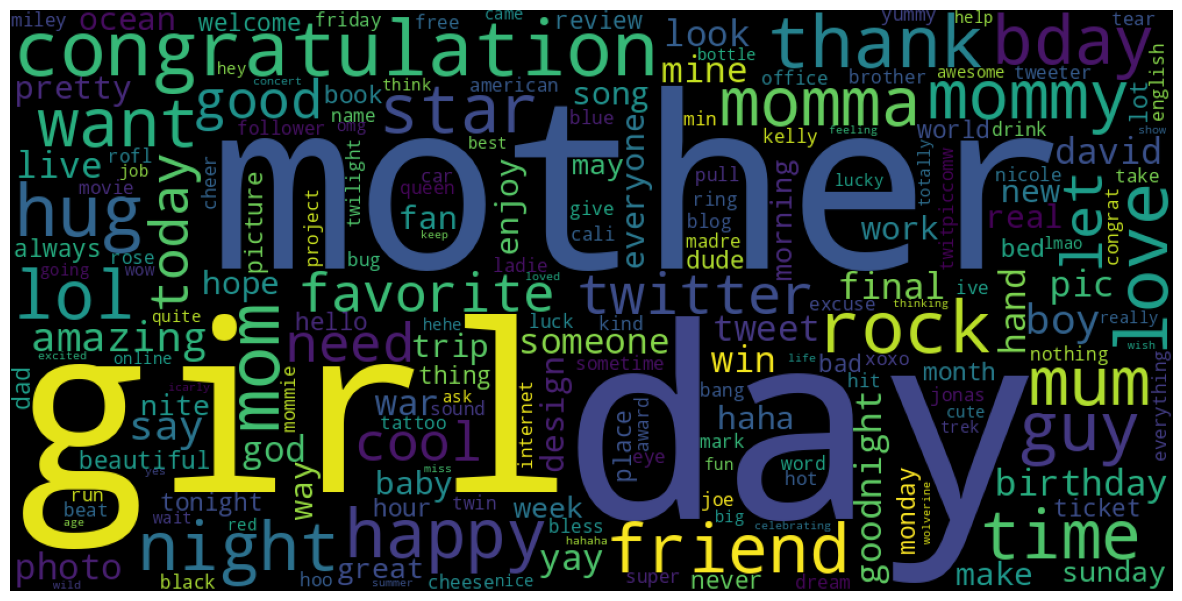

In [86]:
get_wordcloud(nwords)

In [97]:
def process_tweets(dataset):
    try:
        nm_words = ["her", "there", "back", "will", "still", "has", "what", "when", "time",
                    "about", "know", "feel", "too", "don", "your", "much", "think",
                    "this", "like", "with", "out", "even", "did", "them", "hrs", "one",
                    "get", "got", "day", "give"]

        all_words = []
        labels = []

        for index, row in dataset.iterrows():
            text = row['text']
            sentiment = row['sentiment']

            # Verificar si el texto es una cadena
            if isinstance(text, str):
                # Tokenización del texto
                tokens = word_tokenize(text)

                # Filtrado y limpieza de palabras
                cleaned_words = words_filtered(tokens)

                # Agregar palabras limpias a la lista
                all_words.extend(cleaned_words)

                # Agregar etiqueta correspondiente a cada palabra
                labels.extend([1 if sentiment == 'positive' else 0] * len(cleaned_words))

        return all_words, labels

    except Exception as e:
        print(f"Error processing tweets: {e}")

In [98]:
import pandas as pd
dataset = pd.read_csv("/content/train.csv", encoding='unicode_escape', on_bad_lines='skip')

In [100]:
all_words, labels = process_tweets(dataset)

In [103]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV


X_train, X_test, y_train, y_test = train_test_split(all_words, labels, test_size=0.2, random_state=42)


vectorizer = CountVectorizer()
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

param_grid = {
    'alpha': [0.1, 0.5, 1.0, 2.0],
    'fit_prior': [True, False]
}



# 4. Inicializar el clasificador
clf = MultinomialNB()

# 5. Inicializar GridSearchCV
grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy')

# 6. Entrenar el modelo con Grid Search
grid_search.fit(X_train, y_train)

# 7. Obtener el mejor modelo y los mejores hiperparámetros
best_clf = grid_search.best_estimator_
best_params = grid_search.best_params_

# 8. Evaluar el mejor modelo
y_pred = best_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Best parameters: {best_params}")
print(f"Accuracy: {accuracy}")



Best parameters: {'alpha': 2.0, 'fit_prior': True}
Accuracy: 0.7115693295468576


In [104]:
from sklearn.ensemble import RandomForestClassifier

# 1. División de los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(all_words, labels, test_size=0.2, random_state=42)

# 2. Creación de características
vectorizer = CountVectorizer()
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

# 3. Inicializar el clasificador
clf = RandomForestClassifier(random_state=42)

# 4. Entrenar el modelo
clf.fit(X_train, y_train)

# 5. Evaluar el modelo
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

KeyboardInterrupt: 

In [112]:
import numpy as np
# Convertir las etiquetas de clase a un array de numpy
y_train = np.array(y_train)

# Entrenar el modelo con las etiquetas de clase convertidas
clf.fit(X_train, y_train)

def predict_sentiment(text):
    # Preprocesamiento del texto
    text_features = vectorizer.transform([text]).toarray()

    # Predicción
    prediction = clf.predict(text_features)

    # Interpretación del resultado
    if prediction == 1:
        return "Positivo"
    else:
        return "Negativo"

In [113]:
texto= "I love this taylor swift cd is awesome"
sentimiento = predict_sentiment(texto)
print(sentimiento)

Positivo


In [114]:
texto= "This album is one of the worst I've ever listened. Don't buy. 0 stars."
sentimiento = predict_sentiment(texto)
print(sentimiento)

Negativo


In [115]:
texto= "My boyfriend is comin tonight to see me. I am so happy lol"
sentimiento = predict_sentiment(texto)
print(sentimient)

Positivo
